In [3]:
import os
import sklearn
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
import numpy as np
import sys
from matplotlib_venn import venn2
from bs4 import BeautifulSoup, Tag
import matplotlib.pyplot as plt  
import plotly.graph_objects as go
import string
import pickle
from transformers import BertTokenizerFast, BertForTokenClassification, pipeline


In [25]:
PATH_CLEANED_VIKIDIA_PAGES = '../scraper/scraped-pages/cleaned'
PATH_TERENCE = '../CORPORA_TEXT_SIMP/Terence'
PATH_AOA = "../../AoA"
PATH_DESTINATION_PATH = "../../../final_code"

In [4]:
os.getcwd()

'c:\\Users\\andre\\Desktop\\Bicocca\\tesi magi\\scraping\\analytics'

In [5]:
# Move to Vikidia cleaned pages' path
os.chdir(PATH_CLEANED_VIKIDIA_PAGES)

In [6]:
list_all_files = sorted(os.listdir())

In [7]:
def word_in_letter_set(word, acceptable_chars):
    # Check if the word is inside the italian dictionary or in exception list
    validation = set(word)
    if validation.issubset(acceptable_chars):
        return True
    else:
        return False
   

In [8]:
tokenizer = BertTokenizerFast.from_pretrained("osiria/bert-italian-uncased-ner")
model = BertForTokenClassification.from_pretrained("osiria/bert-italian-uncased-ner").to("cuda")
ner = pipeline("ner", model = model, tokenizer = tokenizer, aggregation_strategy="first")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [9]:
def find_subarray(arr1, arr2):
    
    arr1t = [str(a1).lower() for a1 in arr1]
    
    n = len(arr1t)
    m = len(arr2)

    # Iter on ARR1 to find position where ARR2 starts
    for i in range(0, n - m + 1):
        # Verifica se il sottoarray di ARR1 è uguale a ARR2
        # Check if subarray of ARR1 is equal to ARR2
        if arr1t[i:i + m] == arr2:
            return i
    
    # If not found ARR2 in ARR1, return -1
    return -1

In [10]:
# Check type for words and acceptable chars for words
check_word_in = ("AUX", "VERB", "ADJ", "ADV", "")
acceptable_chars = set(
    string.ascii_lowercase + "àèìòùáéíóú" + " "
)

In [11]:
simple_file_all = []

# Load all text of Vikidia
for name_file in list_all_files:
    if name_file.startswith("viki"):
        with open(name_file, 'r', encoding="utf8") as f:

            file_content = str(f.read().encode().decode())

            first_pos = file_content.find("</h2>") + 5

            last_pos = file_content[first_pos:].find("<h2>") + first_pos
            if last_pos < first_pos:
                last_pos = len(file_content)
            
            
            page_html_format = "<html><head></head><body>"+ file_content +"</body></html>"
            page_to_bs = BeautifulSoup(page_html_format, 'html.parser')
            for tag in page_to_bs.find_all('h2'):
                tag.decompose()
            for tag in page_to_bs.find_all('h3'):
                tag.decompose()
            for tag in page_to_bs.find_all('h4'):
                tag.decompose()
            for tag in page_to_bs.find_all('h5'):
                tag.decompose()
            all_full_text = page_to_bs.find("body").get_text()

            stripped_all_full_text = all_full_text.strip()
            
            simple_file_all.append(stripped_all_full_text.lower())

In [12]:
# Scrape data from Terence
def scrape_simplified_data(name_file, tag_parent, id_control = None):
    with open(name_file, 'r', encoding="utf8") as f:
        file_content = str(f.read().encode().decode())
        file_content = "<file>"+ file_content +"<file>"
        page_to_bs = BeautifulSoup(file_content, 'xml')
        if id_control == True:
            semplified_text = page_to_bs.find_all(tag_parent)[1]
        else:
            semplified_text = page_to_bs.find(tag_parent)
        arr_simpl_text = []
        for child in semplified_text.children:
            text = child.get_text()
            if text != "\n":
                arr_simpl_text.append(text.lower())
        return arr_simpl_text


In [13]:
# Move to Terence's path
os.chdir(PATH_TERENCE)

In [14]:
list_all_folder = os.listdir()

In [15]:
os.getcwd()

'c:\\Users\\andre\\Desktop\\Bicocca\\tesi magi\\scraping\\scraper\\scraped-pages\\CORPORA_TEXT_SIMP\\Terence'

In [16]:
all_terence = []
# Load text of Terence
for folder in list_all_folder:
    os.chdir(folder)
    list_all_file = [file_simpl for file_simpl in os.listdir() if ".txt" in file_simpl]
    for file_to_scrape in list_all_file:
        arr_scraped = scrape_simplified_data(file_to_scrape, "semplificato")

        all_terence = all_terence + arr_scraped
    os.chdir("..")


In [17]:
all_terence

['ernesta sparalesta è una bambina alta poco più di un metro.',
 'prima di diventare una eroina, era una piccola esploratrice e viveva nella città di papòf.',
 'un bel giorno, ernesta si affacciò dalla finestra della sua camera e vide un piccolo paese grigio sulla cima di una montagna.',
 'per arrivare al paese, bisognava salire per un sentiero stretto e pieno di sassi.',
 'ernesta non aveva mai notato prima quel posto, così si incuriosì e decise di visitarlo.',
 'dopo aver preso piccone, corda e ganci, andò verso la montagna.',
 'camminò, saltò, superò gli ostacoli, e finalmente arrivò nella piazza del paese.',
 '“ehi, c’è nessuno?” gridò ernesta.',
 'il paese sembrava deserto.',
 'all’improvviso una bambina con i capelli rossi uscì da una casa, si avvicinò ad ernesta, e disse:',
 '“ciao! come ti chiami? non ti ho mai vista prima”.',
 '“sono ernesta sparalesta e vengo dalla città di papòf.',
 'tu chi sei?”',
 '“sono angelica e vivo qui nel paese di “pì”.',
 'ernesta non aveva mai sent

In [18]:
italian_stopwords = ["a", 
"ad",
"agl",
"agli",
"alle",
"allo",
"c", 
"che",
"chi",
"ci",
"coi",
"col",
"con",
"cui",
"da",
"dagl",
"dagli",
"dai",
"dal",
"dall",
"dalla",
"dalle",
"dallo",
"degl"
"degli",
"dei",
"del",
"dell",
"della",
"delle",
"dello",
"di",
"e",
"ed",
"era",
"eri",
"ero",
"fu",
"gli",
"ha",
"ho",
"i",
"il",
"in",
"io",
"l"
"la"
"le",
"lei",
"li",
"lo",
"lui",
"ma",
"mi",
"ne",
"negl",
"negli",
"nei",
"nel",
"nell",
"nella",
"nelle",
"nello",
"noi",
"non",
"o",
"per",
"piu",
"se",
"sei",
"si",
"sia",
"sta",
"sto",
"su",
"sugl",
"sugli",
"sui",
"sul",
"sull",
"sulla",
"sulle",
"sullo",
"ti",
"tra",
"tu",
"un",
"una",
"uno",
"vi",
"voi",
".",
",",
"'",
"\"",
"!",
"@",
"#",
"?",
"(",
")",
"/",
"\\",
"[",
"]",
"{",
"}",
":",
";",
"^",
"“",
"”"]

In [19]:
def list_set_to_set_big(list_set):
    every_list = []
    for mini_set in list_set:
        every_list.extend(list(mini_set))
    
    return set(every_list)

# TERENCE + VIKIDIA general

In [ ]:
final_file = []
final_file.extend(simple_file)
final_file.extend(all_terence)

NameError: name 'simple_file' is not defined

In [18]:
count_vectorizer = CountVectorizer(strip_accents="unicode", analyzer="word", stop_words=italian_stopwords)
matrix_final_count = count_vectorizer.fit_transform(final_file)
tfidf_vectorizer = TfidfTransformer()
tfidf_vectorizer.fit(matrix_final_count.toarray())
feature_names = count_vectorizer.get_feature_names_out()
len_feature_names = len(feature_names)

In [19]:
matrix_count_simple = count_vectorizer.transform(simple_file)
simple_matrix_term = np.where(matrix_count_simple.toarray() > 0, feature_names[:], '')
len(simple_matrix_term)

8068

In [20]:
matrix_count_terence = count_vectorizer.transform(all_terence)
terence_matrix_term = np.where(matrix_count_terence.toarray() > 0, feature_names[:], '')
len(terence_matrix_term)

1043

In [ ]:
# List of sets of words
list_set_simple = []
for row in simple_matrix_term:
    list_set_simple.append(set(row))

list_set_terence = []
for row in terence_matrix_term:
    list_set_terence.append(set(row))

NameError: name 'simple_matrix_term' is not defined

In [23]:
every_set_terence = list_set_to_set_big(list_set_terence)
every_set_simple = list_set_to_set_big(list_set_simple)

In [ ]:
cleaned_every_set_terence = set([checkOkWord(item) for item in list(every_set_terence)])
cleaned_every_set_simple = set([checkOkWord(item) for item in list(every_set_simple)])

In [29]:
print("intersect: " + str(len(cleaned_every_set_terence & cleaned_every_set_simple)))
print("terence: " + str(len(cleaned_every_set_terence)))
print("vikidia general:" + str(len(cleaned_every_set_simple)))

intersect: 1423
terence: 2024
vikidia general:22863


In [24]:
del matrix_final_count
del matrix_count_simple
del matrix_count_terence

In [30]:
del cleaned_every_set_terence
del cleaned_every_set_simple

# TERENCE + TEACHER + VIKIDIA general

In [32]:
final_file = []
final_file.extend(simple_file)
final_file.extend(all_terence)
final_file.extend(all_teacher)

In [33]:
count_vectorizer = CountVectorizer(strip_accents="unicode", analyzer="word", stop_words=italian_stopwords)
matrix_final_count = count_vectorizer.fit_transform(final_file)
tfidf_vectorizer = TfidfTransformer()
tfidf_vectorizer.fit(matrix_final_count.toarray())
feature_names = count_vectorizer.get_feature_names_out()
len_feature_names = len(feature_names)

In [34]:
matrix_count_simple = count_vectorizer.transform(simple_file)
simple_matrix_term = np.where(matrix_count_simple.toarray() > 0, feature_names[:], '')
len(simple_matrix_term)

8068

In [35]:
matrix_count_terence = count_vectorizer.transform(all_terence)
terence_matrix_term = np.where(matrix_count_terence.toarray() > 0, feature_names[:], '')
len(terence_matrix_term)

1043

In [36]:
matrix_count_teacher = count_vectorizer.transform(all_teacher)
teacher_matrix_term = np.where(matrix_count_teacher.toarray() > 0, feature_names[:], '')
len(teacher_matrix_term)

186

In [37]:
list_set_simple = []
for row in simple_matrix_term:
    list_set_simple.append(set(row))

list_set_terence = []
for row in terence_matrix_term:
    list_set_terence.append(set(row))

list_set_teacher= []
for row in teacher_matrix_term:
    list_set_teacher.append(set(row))

In [38]:
every_set_terence = list_set_to_set_big(list_set_terence)
every_set_teacher = list_set_to_set_big(list_set_teacher)
every_set_simple = list_set_to_set_big(list_set_simple)


In [39]:
cleaned_every_set_terence = set([checkOkWord(item) for item in list(every_set_terence)])
cleaned_every_set_simple = set([checkOkWord(item) for item in list(every_set_simple)])
cleaned_every_set_teacher = set([checkOkWord(item) for item in list(every_set_teacher)])

In [40]:
print("intersect: " + str(len(cleaned_every_set_simple & ( cleaned_every_set_terence | cleaned_every_set_teacher))))
print("terence: " + str(len(cleaned_every_set_terence)))
print("teacher: " + str(len(cleaned_every_set_teacher)))
print("vikidia general:" + str(len(cleaned_every_set_simple)))

intersect: 1623
terence: 2024
teacher: 712
vikidia general:22863


In [41]:
cleaned_every_set_simple

{'gibilterra',
 'ministro',
 'ares',
 'Paraibana',
 'facilitare',
 'botanico',
 'denizli',
 'lamaids',
 'Liberandola',
 'Whittaker',
 'Mazerier',
 'legittimare',
 'grilly',
 'novantadue',
 'trobairitz',
 'xbox',
 'rossioso',
 'Aizac',
 'mandato',
 'apprendistato',
 'carbonico',
 'Equus',
 'quincy',
 'flexen',
 'iarda',
 'esprimere',
 'italiano',
 'schirra',
 'cano',
 'ines',
 'includere',
 'ossidare',
 'Masterchef',
 'golgi',
 'vessalico',
 'gliowe',
 'Wisconsin',
 'ballady',
 'modo',
 'rica',
 'atmospheric',
 'Mifi',
 'Java',
 'spaccare',
 'pianta',
 'fano',
 'eisele',
 'roccaverdinare',
 'sonorito',
 'Togolaise',
 'fibra',
 'maranhenso',
 'volpino',
 'Karakol',
 'fattore',
 'poliziotto',
 'ireland',
 'lattanto',
 'limitandola',
 'precedentemente',
 'frodo',
 'sparira',
 'pinedale',
 'morrumbala',
 'mkuranga',
 'corso',
 'organometallico',
 'ventattere',
 'paganino',
 'innescare',
 'milione',
 'bocquelet',
 'Bagneux',
 'ripetere',
 'nonostante',
 'marchamp',
 'harald',
 'lariana',
 'd

In [42]:
del matrix_final_count
del matrix_count_simple
del matrix_count_terence

In [43]:
del cleaned_every_set_terence
del cleaned_every_set_simple 
del cleaned_every_set_teacher 

# TERENCE + TEACHER + VIKIDIA ALL

In [44]:
final_file_all = []
final_file_all.extend(simple_file_all)
final_file_all.extend(all_terence)
final_file.extend(all_teacher)

In [45]:
count_vectorizer_all = CountVectorizer(strip_accents="unicode", analyzer="word", stop_words= italian_stopwords)
matrix_final_count_all = count_vectorizer_all.fit_transform(final_file_all)
tfidf_vectorizer_all = TfidfTransformer()
tfidf_vectorizer_all.fit(matrix_final_count_all.toarray())
feature_names_all = count_vectorizer_all.get_feature_names_out()
len_feature_names_all = len(feature_names_all)

In [46]:
matrix_count_simple_all = count_vectorizer_all.transform(simple_file_all)
simple_matrix_term_all = np.where(matrix_count_simple_all.toarray() > 0, feature_names_all[:], '')
len(simple_matrix_term_all)

8068

In [47]:
del matrix_count_simple_all

In [48]:
matrix_count_terence = count_vectorizer_all.transform(all_terence)
terence_matrix_term_all = np.where(matrix_count_terence.toarray() > 0, feature_names_all[:], '')
len(terence_matrix_term_all)

1043

In [49]:
del matrix_count_terence

In [50]:
matrix_count_teacher = count_vectorizer_all.transform(all_teacher)
teacher_matrix_term = np.where(matrix_count_teacher.toarray() > 0, feature_names_all[:], '')
len(teacher_matrix_term)

186

In [51]:
del matrix_count_teacher

In [52]:
list_set_simple_all = []
for row in simple_matrix_term_all:
    list_set_simple_all.append(set(row))

list_set_terence = []
for row in terence_matrix_term:
    list_set_terence.append(set(row))

list_set_teacher= []
for row in teacher_matrix_term:
    list_set_teacher.append(set(row))

In [53]:
every_set_terence = list_set_to_set_big(list_set_terence)
every_set_teacher = list_set_to_set_big(list_set_teacher)
every_set_simple_all = list_set_to_set_big(list_set_simple_all)


In [54]:
cleaned_every_set_terence = set([checkOkWord(item) for item in list(every_set_terence)])
cleaned_every_set_simple_all = set([checkOkWord(item) for item in list(every_set_simple_all)])
cleaned_every_set_teacher = set([checkOkWord(item) for item in list(every_set_teacher)])

In [55]:
print("intersect: " + str(len(cleaned_every_set_simple_all & (cleaned_every_set_terence | cleaned_every_set_teacher))))
print("terence: " + str(len(cleaned_every_set_terence)))
print("teacher: " + str(len(cleaned_every_set_teacher)))
print("vikidia general:" + str(len(cleaned_every_set_simple_all)))

intersect: 1966
terence: 2024
teacher: 655
vikidia general:46125


In [56]:
del cleaned_every_set_terence
del cleaned_every_set_simple_all
del cleaned_every_set_teacher

# TERENCE + VIKIDIA ALL

In [57]:
final_file_all = []
final_file_all.extend(simple_file_all)
final_file_all.extend(all_terence)

In [58]:
count_vectorizer_all = CountVectorizer(strip_accents="unicode", analyzer="word", stop_words= italian_stopwords)
matrix_final_count_all = count_vectorizer_all.fit_transform(final_file_all)
tfidf_vectorizer_all = TfidfTransformer()
tfidf_vectorizer_all.fit(matrix_final_count_all.toarray())
feature_names_all = count_vectorizer_all.get_feature_names_out()
len_feature_names_all = len(feature_names_all)

In [59]:
matrix_count_simple_all = count_vectorizer_all.transform(simple_file_all)
simple_matrix_term_all = np.where(matrix_count_simple_all.toarray() > 0, feature_names_all[:], '')
len(simple_matrix_term_all)

8068

In [60]:
del matrix_count_simple_all

In [61]:
matrix_count_terence = count_vectorizer_all.transform(all_terence)
terence_matrix_term_all = np.where(matrix_count_terence.toarray() > 0, feature_names_all[:], '')
len(terence_matrix_term_all)

1043

In [62]:
del matrix_count_terence

In [63]:
list_set_simple_all = []
for row in simple_matrix_term_all:
    list_set_simple_all.append(set(row))

list_set_terence = []
for row in terence_matrix_term_all:
    list_set_terence.append(set(row))

In [64]:
every_set_terence = list_set_to_set_big(list_set_terence)
every_set_simple_all = list_set_to_set_big(list_set_simple_all)

In [65]:
cleaned_every_set_terence = set([checkOkWord(item) for item in list(every_set_terence)])
cleaned_every_set_simple_all = set([checkOkWord(item) for item in list(every_set_simple_all)])


In [66]:
print("intersect: " + str(len(cleaned_every_set_simple_all & cleaned_every_set_terence )))
print("terence: " + str(len(cleaned_every_set_terence)))
print("vikidia general:" + str(len(cleaned_every_set_simple_all)))

intersect: 1731
terence: 2024
vikidia general:46125


In [67]:
del cleaned_every_set_terence
del cleaned_every_set_simple_all

# VIKIDIA + AGE

In [23]:
os.getcwd()

'c:\\Users\\andre\\Desktop\\Bicocca\\tesi magi\\scraping\\scraper\\scraped-pages\\CORPORA_TEXT_SIMP'

In [20]:
os.chdir("../AoA")

In [21]:
aoa_dataset = pd.read_excel("itAoA.xlsx")

In [22]:
aoa_dataset

,Ita_Word,Eng_Word,WordClass,M_AoA,SD_AoA,#L,WF_LaRepubblica,WF_ItWaC,WF_Subtlex,#OrtNB,M_WF_OrtNB,MaxWF_OrtNB,OLD20_Subtlex
0,abbaglio,dazzle,n,9.360000,2.956349,8.0,6.347389,3.931826,3.891820,1.0,0.272586,0.272586,2.10
1,abbandonato,derelict,a,6.680000,2.672702,11.0,8.624971,8.023880,8.023880,4.0,2.495203,3.001456,1.70
2,abbondanza,abundance,n,6.960000,2.071232,10.0,7.718241,6.124683,6.122493,1.0,0.272586,0.272586,2.65
3,abbracciare,to hug,v,2.840000,0.800000,11.0,8.896041,8.010028,6.118097,1.0,0.486563,0.486563,1.80
4,abbraccio,hug,n,4.200000,1.290994,9.0,8.480529,7.415175,7.170888,2.0,1.819763,1.939287,2.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,zucca,pumpkin,n,5.160000,1.907878,5.0,6.139885,6.770789,6.533789,6.0,1.161118,1.983364,1.75
1953,zucchero,sugar,n,4.280000,1.860108,8.0,8.050703,7.791936,7.712444,1.0,1.340308,1.340308,2.15
1954,zucchina,courgette,n,5.440000,2.739830,8.0,4.143135,4.795791,3.951244,2.0,1.654473,2.105014,2.25
1955,zuffa,brawl,n,9.541667,2.449120,5.0,1.791759,4.753590,4.553877,5.0,1.013345,1.740529,1.75


In [ ]:
aoa_dataset = aoa_dataset[["Ita_Word", "M_AoA"]]
aoa_dataset_filterd_by_age = aoa_dataset[aoa_dataset["M_AoA"] <= 11.0]
aoa_dataset_filterd_by_age

,Ita_Word,M_AoA
0,abbaglio,9.360000
1,abbandonato,6.680000
2,abbondanza,6.960000
3,abbracciare,2.840000
4,abbraccio,4.200000
...,...,...
1952,zucca,5.160000
1953,zucchero,4.280000
1954,zucchina,5.440000
1955,zuffa,9.541667


In [42]:
aoa_dataset_filterd_by_age["nlp_apply"] = aoa_dataset_filterd_by_age["Ita_Word"].apply(is_italian_word)
aoa_dataset_filterd_by_age

C:\Users\andre\AppData\Local\Temp\ipykernel_27632\1116616575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aoa_dataset_filterd_by_age["nlp_apply"] = aoa_dataset_filterd_by_age["Ita_Word"].apply(is_italian_word)


,Ita_Word,M_AoA,nlp_apply
0,abbaglio,9.360000,1
1,abbandonato,6.680000,1
2,abbondanza,6.960000,1
3,abbracciare,2.840000,1
4,abbraccio,4.200000,1
...,...,...,...
1952,zucca,5.160000,1
1953,zucchero,4.280000,1
1954,zucchina,5.440000,1
1955,zuffa,9.541667,1


# VIKIDIA ALL + AGE + TERENCE

In [20]:
os.getcwd()

'c:\\Users\\andre\\Desktop\\Bicocca\\tesi magi\\scraping\\scraper\\scraped-pages\\CORPORA_TEXT_SIMP\\Terence'

In [24]:
os.chdir(PATH_AOA)

In [26]:
# Only Age of Acquistion under 11
aoa_dataset = pd.read_excel("itAoA.xlsx")
aoa_dataset = aoa_dataset[["Ita_Word", "M_AoA", "WordClass"]]
aoa_dataset_filterd_by_age = aoa_dataset[aoa_dataset["M_AoA"] <= 11][["Ita_Word", "WordClass"]]

In [27]:
all_aoa = aoa_dataset_filterd_by_age["Ita_Word"].tolist()
len(all_aoa)

1897

In [28]:
# Unique array
final_file_all = []
final_file_all.extend(simple_file_all)
final_file_all.extend(all_terence)
final_file_all.extend(all_aoa)

In [29]:
count_vectorizer_all = CountVectorizer(strip_accents="unicode", analyzer="word", stop_words= italian_stopwords)
matrix_final_count_all = count_vectorizer_all.fit_transform(final_file_all)
tfidf_vectorizer_all = TfidfTransformer()
tfidf_vectorizer_all.fit(matrix_final_count_all.toarray())
feature_names_all = count_vectorizer_all.get_feature_names_out()
len_feature_names_all = len(feature_names_all)

In [30]:
matrix_count_simple_all = count_vectorizer_all.transform(simple_file_all)
simple_matrix_term_all = np.where(matrix_count_simple_all.toarray() > 0, feature_names_all[:], '')
len(simple_matrix_term_all)

8068

In [31]:
del matrix_count_simple_all

In [32]:
matrix_count_terence = count_vectorizer_all.transform(all_terence)
terence_matrix_term_all = np.where(matrix_count_terence.toarray() > 0, feature_names_all[:], '')
len(terence_matrix_term_all)

1043

In [33]:
del matrix_count_terence

In [34]:
list_set_simple_all = []
for row in simple_matrix_term_all:
    list_set_simple_all.append(set(row))

list_set_terence = []
for row in terence_matrix_term_all:
    list_set_terence.append(set(row))

In [35]:
every_set_terence = list_set_to_set_big(list_set_terence)
every_set_simple_all = list_set_to_set_big(list_set_simple_all)

In [36]:
cleaned_every_set_terence = set([ item for item in list(every_set_terence) if word_in_letter_set(item, acceptable_chars) ])
cleaned_every_set_simple_all = set([item for item in list(every_set_simple_all) if word_in_letter_set(item, acceptable_chars) ])
cleaned_every_set_aoa = set(aoa_dataset_filterd_by_age["Ita_Word"].tolist())

In [37]:
print(len(cleaned_every_set_terence))
print(len(cleaned_every_set_simple_all))
print(len(cleaned_every_set_aoa))

2821
59116
1897


In [38]:
cleaned_every_set_total_all = cleaned_every_set_terence | cleaned_every_set_simple_all | cleaned_every_set_aoa

In [39]:
len(cleaned_every_set_total_all)

59973

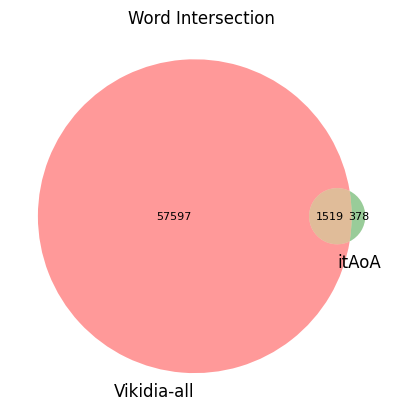

In [ ]:
venn = venn2([cleaned_every_set_simple_all, cleaned_every_set_aoa], set_labels=('Vikidia-all', 'itAoA' ))

for text in venn.subset_labels:
    # Check label existence (None if empty intersection)
    if text:  
        text.set_fontsize(8)

plt.title("Word Intersection")
plt.show()

In [ ]:
os.chdir(PATH_DESTINATION_PATH)

In [41]:
with open('cleaned_every_set_total_all.pickle', 'wb') as file:
    pickle.dump(cleaned_every_set_total_all, file)